In [81]:
import time
import numpy as np
import matplotlib.pyplot as plt
import utils_img_rec as ut

import pathlib

import cv2
import tqdm
import os

import pickle
inicio = time.time()

In [82]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [83]:
def detect_faces(img):
    
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces_detected = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)



    if len(faces_detected) > 0:
        (x, y, w, h) = faces_detected[0]
        print(len(faces_detected))

        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img_rgb, cmap='gray')
        plt.show()
    else:
        print("Nenhuma face detectada")


faustao (1).jpg
2


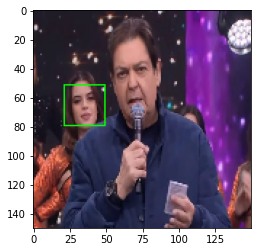

faustao (10).jpg
1


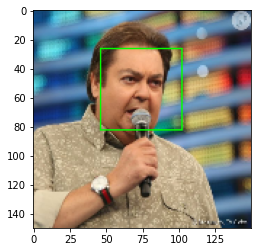

faustao (11).jpg
1


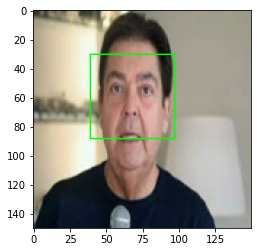

faustao (12).jpg
1


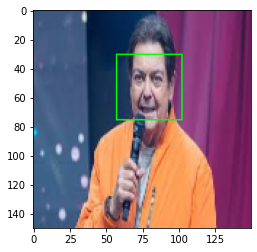

faustao (13).jpg
1


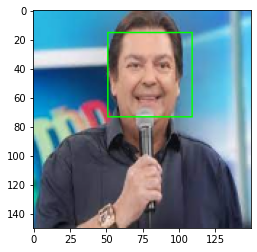

faustao (14).jpg
1


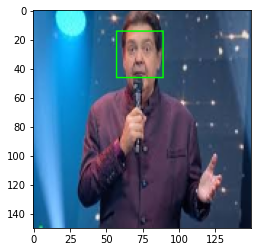

faustao (15).jpg
1


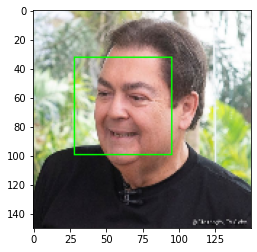

faustao (16).jpg
1


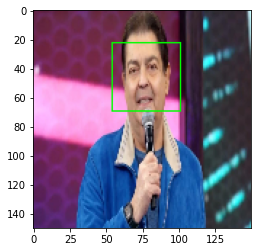

faustao (17).jpg
1


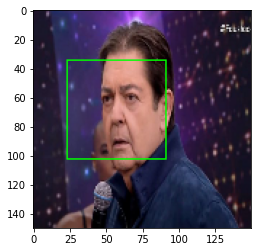

faustao (18).jpg
1


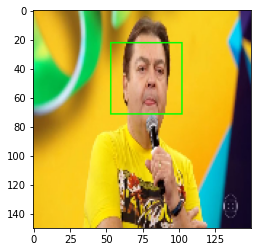

faustao (19).jpg
1


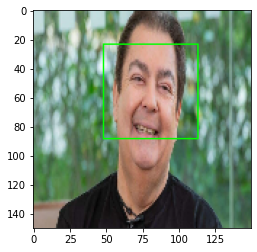

faustao (2).jpg
1


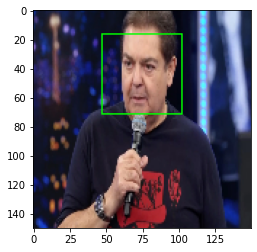

faustao (20).jpg
1


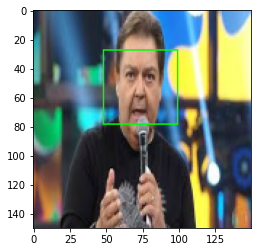

faustao (3).jpg
1


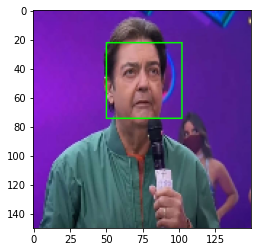

faustao (4).jpg
1


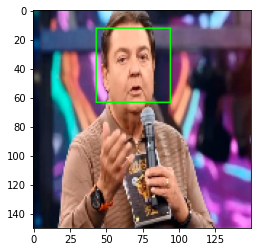

faustao (5).jpg
1


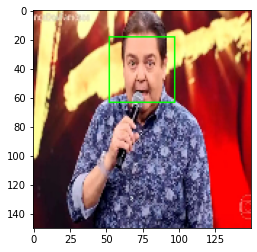

faustao (6).jpg
1


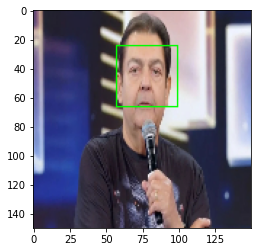

faustao (7).jpg
1


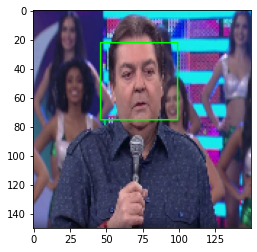

faustao (8).jpg
1


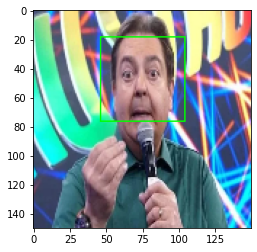

faustao (9).jpg
1


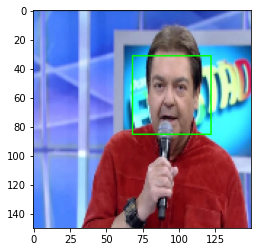

imgs_num: 20


In [84]:
path = "../../../_DATA_/image/face/faustao"
lista_dir = os.listdir(path)
i=0

for img_name in lista_dir:
    i+=1
#   img_array = cv2.imread(os.path.join(path,img_name) ,cv2.IMREAD_GRAYSCALE)
    img_array = cv2.imread(os.path.join(path,img_name) ,cv2.cv2.IMREAD_COLOR)
    img_array = cv2.resize(img_array, (150, 150))
    #img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)


    
    print(img_name)

    detect_faces(img_array)


print(f'imgs_num: {i}')

In [85]:
#DATADIR = r"..\..\..\_DATA_\image\face\faustao\faustao.jpg"
DATADIR = "ratinho.jpg"

path = pathlib.Path(DATADIR)
print(path)

ratinho.jpg


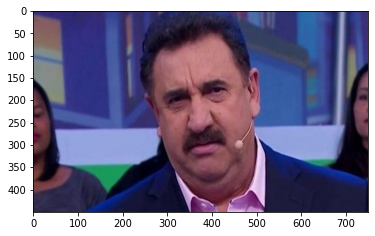

In [86]:
img = cv2.imread(str(path) ,cv2.cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb, cmap='gray')
plt.show()

In [87]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces_detected = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

1


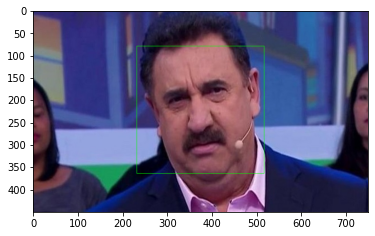

In [88]:
print(len(faces_detected))
(x, y, w, h) = faces_detected[0]
img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb, cmap='gray')
plt.show()

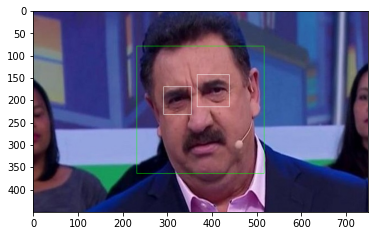

In [89]:
eyes = eyes_cascade.detectMultiScale(img[y:y+h, x:x+w])
for (ex, ey, ew, eh) in eyes:
    img = cv2.rectangle(img, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (255, 255, 255), 1)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb, cmap='gray')
plt.show()
#rodar a imagem para alinhar os 2 olhos

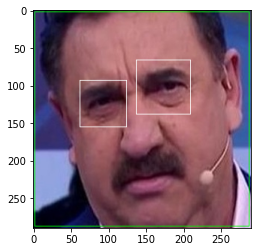

In [90]:
p=3 #padding, margem
img = img[y-p+1:y+h+p, x-p+1:x+w+p]


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb, cmap='gray')
plt.show()
